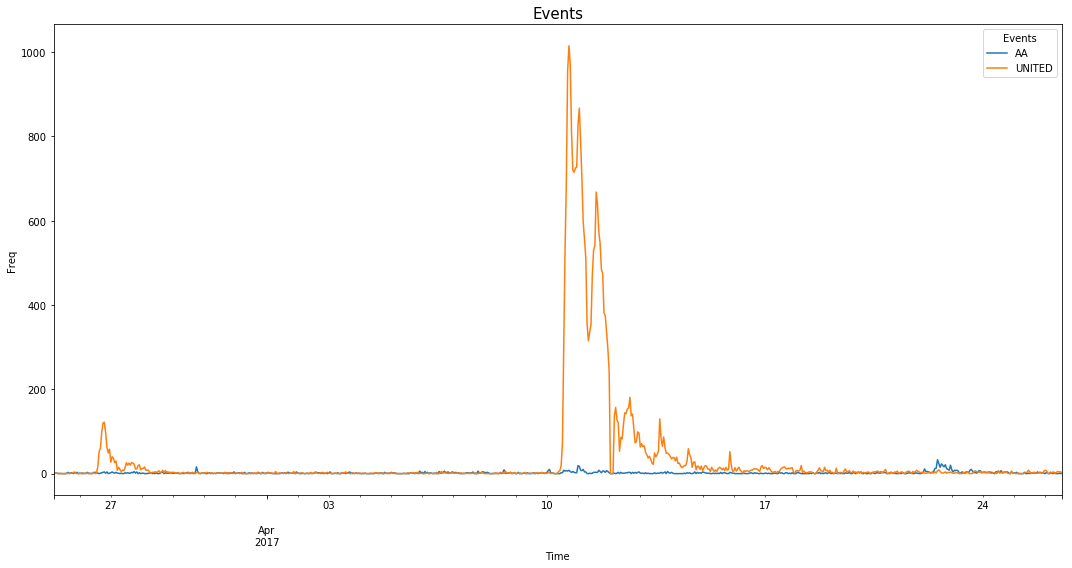

In [122]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from operator import itemgetter
from nltk.tokenize import TweetTokenizer
from pprint import pprint

import pandas
import json

dates_UNITED = []
import json
tweets_data_file = open('/Data/results/April/Exp1/ua.json','r')
tweets_data_file_aa = open('/Data/results/April/Exp1/aa.json','r')


tweet_data = json.load(tweets_data_file)
tweet_data_aa = json.load(tweets_data_file_aa)

tweets = pd.DataFrame()

dates_UNITED = map(lambda tweet: tweet['created_at'], tweet_data['tweets'])
dates_AA = map(lambda tweet: tweet['created_at'], tweet_data_aa['tweets'])

# a list of "1" to count the tweets
ones = [1]*len(dates_UNITED)
ones_aa = [1]*len(dates_AA)


# the index of the series
idx = pandas.DatetimeIndex(dates_UNITED)
# the actual series (at series of 1s for the moment)
UNITED = pandas.Series(ones, index=idx)

idx_aa = pandas.DatetimeIndex(dates_AA)
AA = pandas.Series(ones_aa, index=idx_aa)

%matplotlib inline

per_minute = UNITED.resample('60Min').sum().fillna(0)
per_minute_aa = AA.resample('60Min').sum().fillna(0)

# all the data together
#match_data = dict(UNITED=per_minute)
match_data = dict(UNITED=per_minute, AA=per_minute_aa)

# we need a DataFrame, to accommodate multiple series
all_matches = pandas.DataFrame(data=match_data,
                               index=per_minute.index)

all_matches = all_matches.resample('60Min').sum().fillna(0)

plt = all_matches.plot(figsize=(15,8),fontsize=10)
plt.legend(title='Events')
plt.set_title("Events",fontsize=15)
plt.set_xlabel("Time")
plt.set_ylabel("Freq")

labels_all = [e for e in per_minute.index]

fig = plt.get_figure()
fig.tight_layout()
fig.savefig('../TDI/timeseries_events_2.png')


In [57]:
max(per_minute.index)

Timestamp('2017-04-26 13:00:00', freq='60T')

In [64]:
start, end = plt.get_xlim()
print start,end

24840240.0 24886860.0


In [15]:

#match_data = dict(UNITED=per_minute)
match_data_ua = dict(UNITED=per_minute)

# we need a DataFrame, to accommodate multiple series
matches_ua = pandas.DataFrame(data=match_data_ua,
                               index=per_minute.index)
# Resampling as above
matches_ua = matches_ua.resample('60Min').sum().fillna(0)
#all_matches = all_matches.sum().fillna(0)


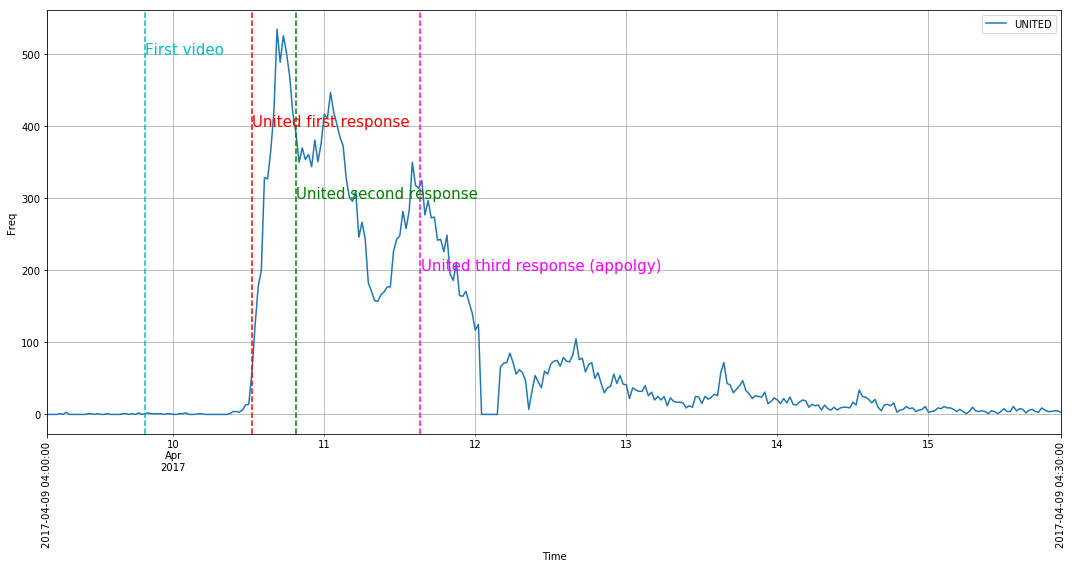

In [120]:
per_thirty = UNITED.resample('30Min').sum().fillna(0)
i = per_thirty['2017-04-09 04:00:00': '2017-04-15 21:00:00']

#match_data = dict(UNITED=per_minute)
match_data_ua = dict(UNITED=per_thirty)

# we need a DataFrame, to accommodate multiple series
matches_ua = pandas.DataFrame(data=match_data_ua,
                               index=per_thirty.index)

plt_ua = matches_ua['2017-04-09 04:00:00':'2017-04-15 21:00:00'].plot(figsize=(15,8),fontsize=10)
plt_ua.set_xlabel("Time")
plt_ua.set_ylabel("Freq")
plt_ua.grid(b='on',which='both')

labels = [e for e in i.index]
plt_ua.set_xticklabels(labels,rotation=90)

plt_ua.axvline('2017-04-09 19:30:00',linestyle='--',color='c')
plt_ua.text('2017-04-09 19:35:00',500,'First video',color = 'c',fontsize=15)

plt_ua.axvline('2017-04-10 12:27:00',linestyle='--',color='r')
plt_ua.text('2017-04-10 12:30:00',400,'United first response',color = 'r',fontsize=15)

plt_ua.axvline('2017-04-10 19:30:00',linestyle='--',color='green')
plt_ua.text('2017-04-10 19:35:00',300,'United second response',color = 'green',fontsize=15)

plt_ua.axvline('2017-04-11 15:10:00',linestyle='--',color='magenta')
plt_ua.text('2017-04-11 15:20:00',200,'United third response (appolgy)',color = 'magenta',fontsize=15)

fig_ua = plt_ua.get_figure()
fig_ua.tight_layout()
fig_ua.savefig('../TDI/timeseries_ua_zoom_2.png')

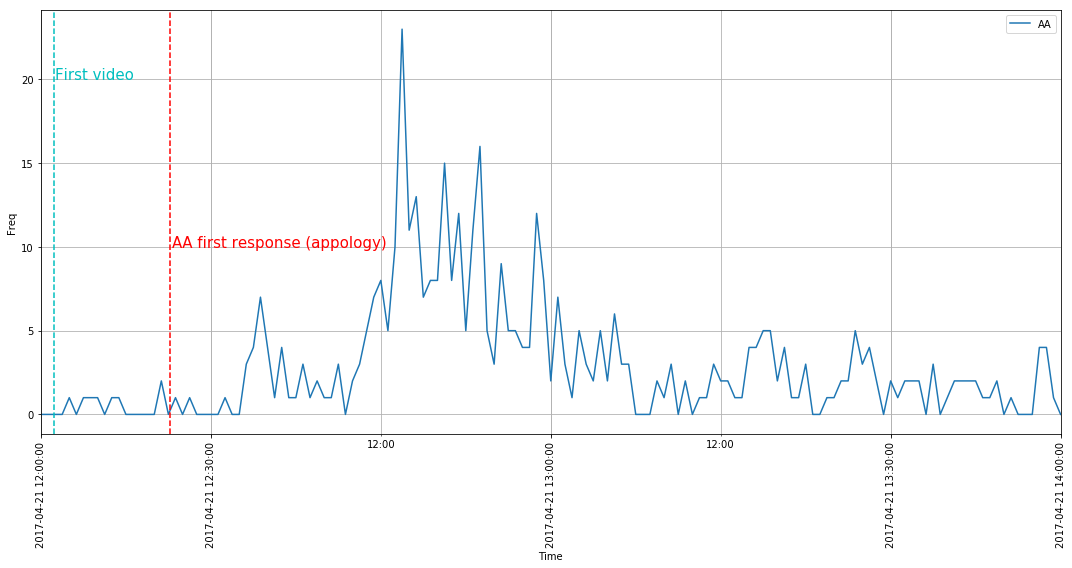

In [117]:
per_thirty_aa = AA.resample('30Min').sum().fillna(0)
i = per_thirty_aa['2017-04-21 12:00:00': '2017-04-24 12:00:00']

#match_data = dict(UNITED=per_minute)
match_data_aa = dict(AA=per_thirty_aa)

# we need a DataFrame, to accommodate multiple series
matches_aa = pandas.DataFrame(data=match_data_aa,
                               index=per_thirty_aa.index)

plt_aa = matches_aa['2017-04-21 12:00:00': '2017-04-24 12:00:00'].plot(figsize=(15,8),fontsize=10)
plt_aa.set_xlabel("Time")
plt_aa.set_ylabel("Freq")
plt_aa.grid(b='on',which='both')

labels = [e for e in i.index]
plt_aa.set_xticklabels(labels,rotation=90)

plt_aa.axvline('2017-04-21 12:54:00',linestyle='--',color='c')
plt_aa.text('2017-04-21 12:59:00',20,'First video',color = 'c',fontsize=15)

plt_aa.axvline('2017-04-21 21:06:00',linestyle='--',color='r')
plt_aa.text('2017-04-21 21:16:00',10,'AA first response (appology)',color = 'r',fontsize=15)


fig_aa = plt_aa.get_figure()
fig_aa.tight_layout()
fig_aa.savefig('../TDI/timeseries_aa_zoom_2.png')

In [91]:
i = per_minute['2017-04-09 04:00:00': '2017-04-15 21:00:00']
#i.getfield('2017-04-12 04:00:00')
i.index[0]

Timestamp('2017-04-09 04:00:00', freq='60T')

In [66]:
%matplotlib inline
time_chart.to_json('term_freq.json', html_out=True, html_path='chart8.html')
